## Data Cleaning

Data cleaning is the process of fixing or removing incorrect, corrupted, incorrectly formatted, duplicate, or incomplete data within a dataset. When combining multiple data sources, there are many opportunities for data to be duplicated or mislabeled. We have to first clean the data for feeding to our model for better performance accuracy.


### Let's first import all the required packages

<b>numpy</b>: for working with arrays  
<b>matplotlib</b>: for plotting purposes  
<b>pandas</b>: for working with dataframes  
<b>seaborn</b>: for visualising different correlations

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

#### We first import our dirty dataset, we have found this dataset from Kaggle. This contains house prices depending upon multiple features.  
<span style='color:violet'>pd.read_csv</span> a pandas function helps us read any csv file.

In [2]:
df = pd.read_csv('clean_train.csv')

We use <span style='color:violet'>.shape</span> to check the dimension of the dataset at hand. There are 81 columns meaning 80 features and 1 target.

In [3]:
df.shape 

(1460, 81)

<span style='color:violet'>.head(number)</span> helps us to show only the specific number of rows(as given by the number) in a dataset from the top, similarly <span style='color:violet'>.tail(number)</span> will do the same only from the bottom of the dataset.

In [4]:
df.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


As there are large number of rows and columns, by default we can only see few of the entire dataset. But to view all rows and columns we have to give below commands.

In [5]:
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

In [6]:
df.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


Below command will show the statistics of the dataset and from that we can know how many missing elements are there, the types of the elements whether they are integer or float or character, all the names of the features etc.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

The command below will show in total how many elements are <b>missing</b> in a particular feature/column

In [8]:
df.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

Let's plot this <span style='color:violet'>df.isnull()</span> in a seaborn heatmap to visualise all the missing elements. The white patches in the black plot are the missing elements. We should work to remove as much white patches as possible and that is nothing but our <b>data cleaning</b>.  
<span style='color:violet'>figsize=(number,number)</span> will help us set the dimension of the plot, here we want to make a wide plot so that feature names are bit visible. 

<AxesSubplot:>

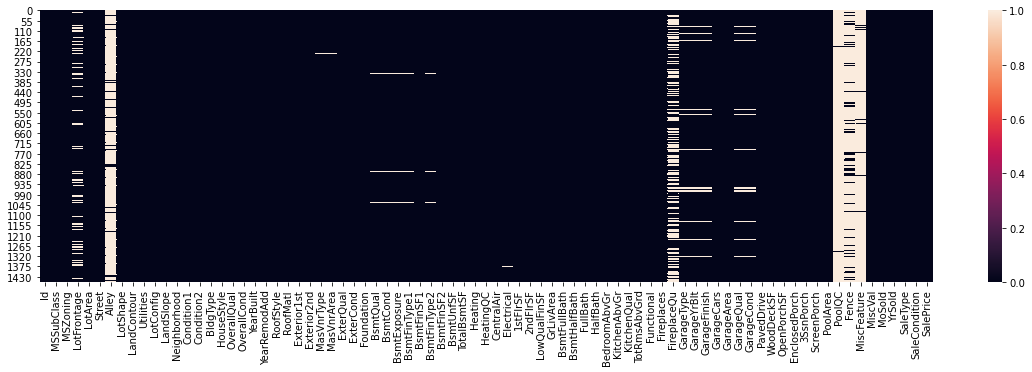

In [9]:
plt.figure(figsize=(20,5))
sns.heatmap(df.isnull())

Let's check what percentage of data is missing from a particular feature.

In [10]:
null_var = df.isnull().sum()/df.shape[0]*100

After checking all the percentages, we feel that we should remove all the features that have more than 17% missing elements.

In [11]:
drop_columns = null_var[null_var>17].keys()

These are the features that need to be dropped immediately, we can do that by using <span style='color:violet'>.drop</span> command

In [12]:
drop_columns

Index(['LotFrontage', 'Alley', 'FireplaceQu', 'PoolQC', 'Fence',
       'MiscFeature'],
      dtype='object')

In [13]:
df_dropped = df.drop(columns=drop_columns)

Now let's check the new dimension of our dataset, we can see columns has dropped from a number <b>81 to 75</b>, which means we have dropped all the columns in drop_columns.

In [14]:
df_dropped.shape

(1460, 75)

Now let's plot the new dataset <b>df_dropped</b>. We can see this looks much cleaner but still some little patches are there, we have to remove them also.

<AxesSubplot:>

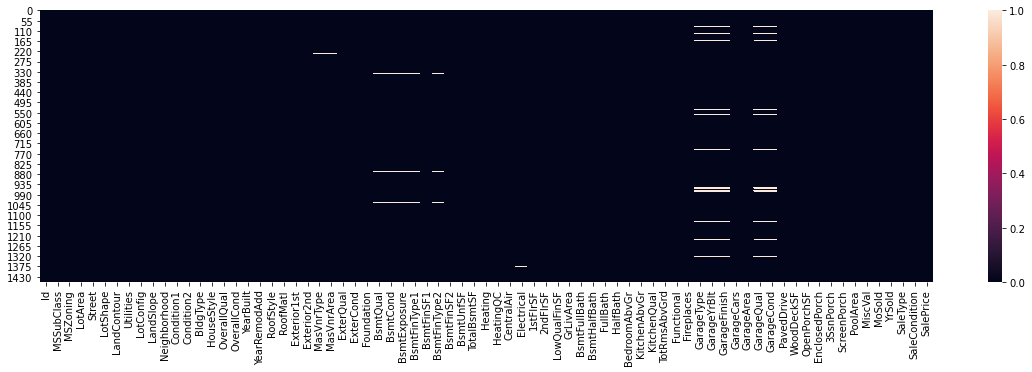

In [15]:
plt.figure(figsize=(20,5))
sns.heatmap(df_dropped.isnull())

Now we will use <span style='color:violet'>.dropna</span> method drop all the rows which have atleast 1 null value

In [16]:
df_dropped_rows = df_dropped.dropna()

Now we can see our data has been cleaned well.

<AxesSubplot:>

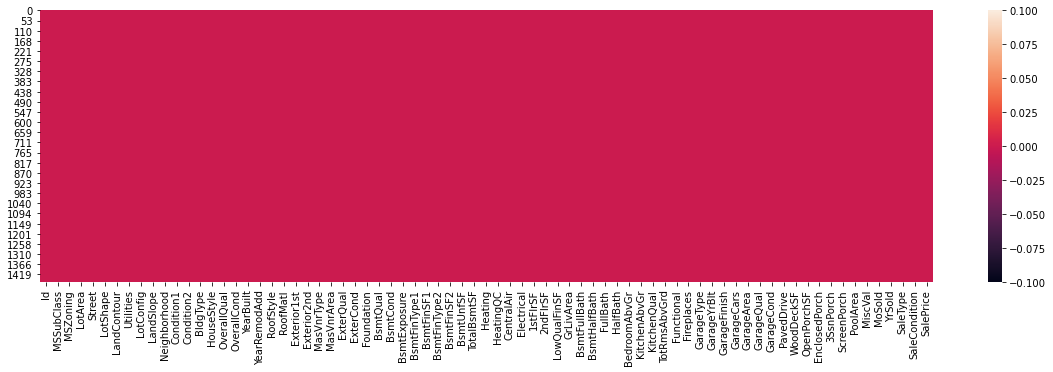

In [17]:
plt.figure(figsize=(20,5))
sns.heatmap(df_dropped_rows.isnull())

To check whether there is any missing value left we use the following command, it returns the total number of missing values in the entire dataset.  
We can see we get <b>0</b>

In [18]:
df_dropped_rows.isnull().sum().sum()

0

Now is the time to check whether our data distribution has changed or not because of this data cleaning. We don't expect it to change. We can check that by using <span style='color:violet'>.distplot/.histplot/.displot</span>. First we will check for integers and floats and then for categorical variables. 

In [19]:
df_dropped_rows.select_dtypes(include=['int64','float64']).columns # columns including integer and float variables

Index(['Id', 'MSSubClass', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

<AxesSubplot:xlabel='MSSubClass', ylabel='Density'>

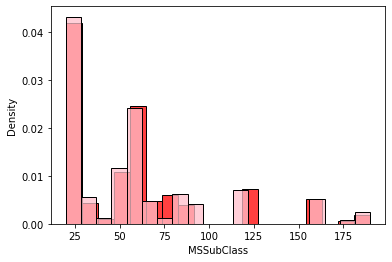

In [47]:
sns.histplot(df_dropped_rows['MSSubClass'],stat='density',color='r') # checking for one single column
sns.histplot(df['MSSubClass'],stat='density',color='pink')

We can see our data distribution is almost same as before, this means our data cleaning has not affected the staistics of the data. Now let's check for all the other columns.

In [21]:
df_nums = df_dropped_rows.select_dtypes(include=['int64','float64']).columns

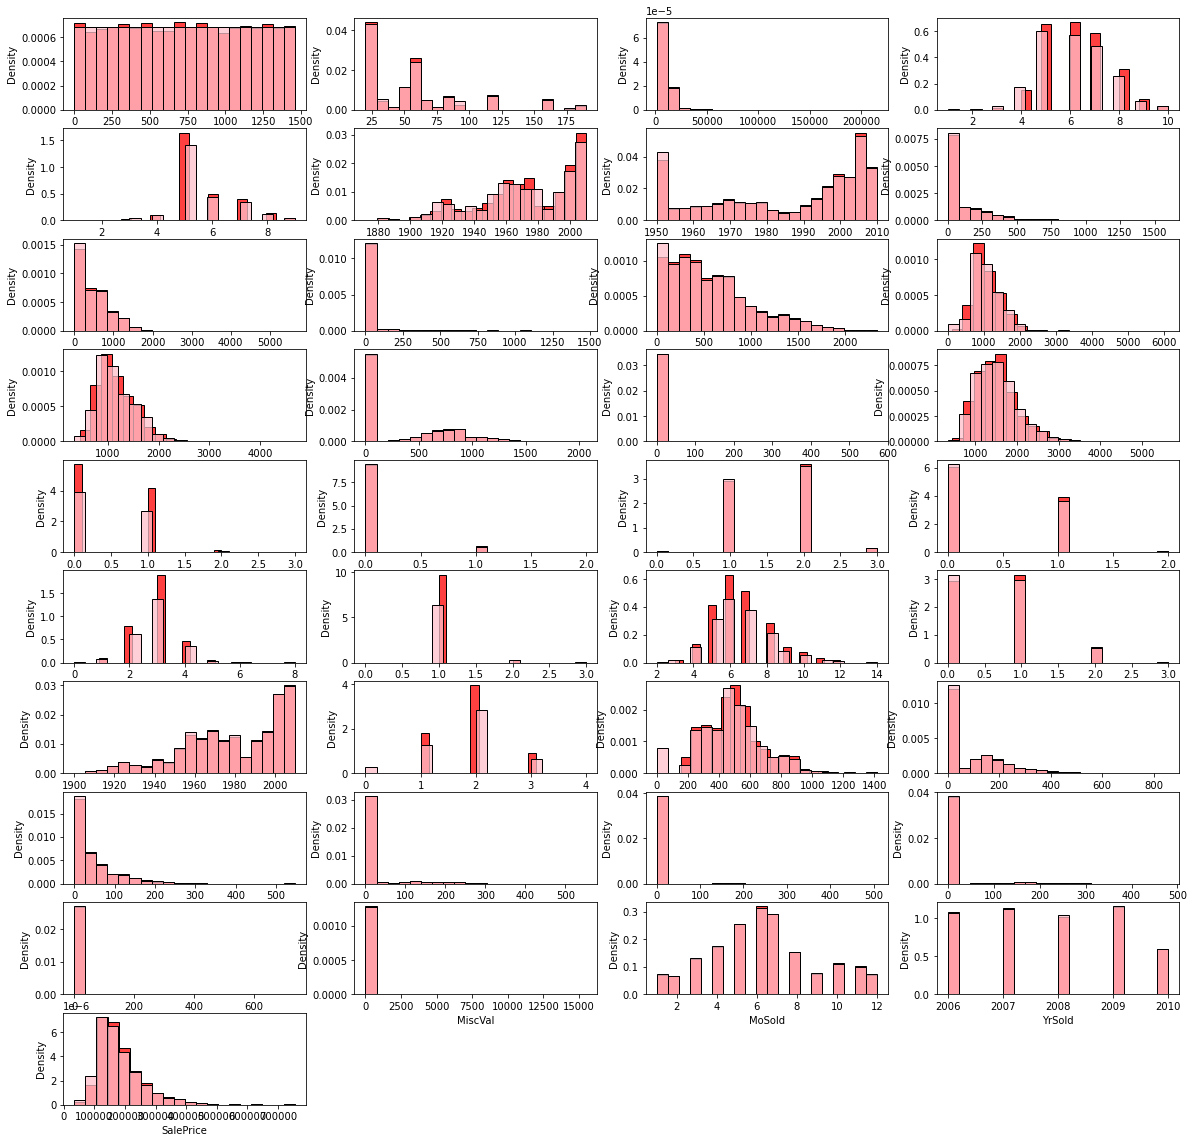

In [48]:
plt.figure(figsize=(20,20))
for i, var in enumerate(df_nums):
    plt.subplot(10,4,i+1)
    sns.histplot(df_dropped_rows[var],stat='density',bins=20,color='r')
    sns.histplot(df[var],stat='density',bins=20,color='pink')

Now let's check for categorical variables

In [49]:
df_dropped_rows.select_dtypes(include=['object']).columns

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')

In [52]:
df_dropped_rows['MSZoning'].value_counts() # this shows the counts of all the different categories

RL         1066
RM          191
FV           62
RH           11
C (all)       8
Name: MSZoning, dtype: int64

In [53]:
df['MSZoning'].value_counts()

RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64

We check if the percentage of each category in every categorical variable has changed much or not beacuse of our data cleaning process. For example we see for <b>'MSZoning'</b> it has not changed much, similarly we will check for all other categorical variables.

In [54]:
pd.concat([df['MSZoning'].value_counts()/df.shape[0]*100,
           df_dropped_rows['MSZoning'].value_counts()/df_dropped_rows.shape[0]*100], axis = 1,
         keys = ['MSZoning_original','MSZoning_clean'])

,MSZoning_original,MSZoning_clean
RL,78.835616,79.671151
RM,14.931507,14.275037
FV,4.452055,4.633782
RH,1.095890,0.822123
C (all),0.684932,0.597907


In [ ]:
df_char = df_dropped_rows.select_dtypes(include=['object']).columns

In [27]:
def cat_var_dist(var):
    return pd.concat([df[var].value_counts()/df.shape[0]*100,
           df_dropped_rows[var].value_counts()/df_dropped_rows.shape[0]*100], axis = 1,
           keys = [var+'_original',var+'_clean'])

In [55]:
for var in df_char:
    print(cat_var_dist(var))

         MSZoning_original  MSZoning_clean
RL               78.835616       79.671151
RM               14.931507       14.275037
FV                4.452055        4.633782
RH                1.095890        0.822123
C (all)           0.684932        0.597907
      Street_original  Street_clean
Pave        99.589041     99.626308
Grvl         0.410959      0.373692
     LotShape_original  LotShape_clean
Reg          63.356164       61.958146
IR1          33.150685       34.304933
IR2           2.808219        2.989537
IR3           0.684932        0.747384
     LandContour_original  LandContour_clean
Lvl             89.794521          90.134529
Bnk              4.315068           3.886398
HLS              3.424658           3.587444
Low              2.465753           2.391629
        Utilities_original  Utilities_clean
AllPub           99.931507        99.925262
NoSeWa            0.068493         0.074738
         LotConfig_original  LotConfig_clean
Inside            72.054795        71

Sev              0.068493          0.074738
         GarageType_original  GarageType_clean
Attchd             59.589041         63.677130
Detchd             26.506849         27.578475
BuiltIn             6.027397          6.352765
Basment             1.301370          1.420030
CarPort             0.616438          0.523169
2Types              0.410959          0.448430
     GarageFinish_original  GarageFinish_clean
Unf              41.438356           43.348281
RFn              28.904110           30.866966
Fin              24.109589           25.784753
    GarageQual_original  GarageQual_clean
TA            89.794521         94.917788
Fa             3.287671          3.587444
Gd             0.958904          1.046338
Po             0.205479          0.224215
Ex             0.205479          0.224215
    GarageCond_original  GarageCond_clean
TA            90.821918         96.188341
Fa             2.397260          2.466368
Gd             0.616438          0.672646
Po             0.47

## End of the lesson